In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GaussianDropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [5]:
! pwd

/content


In [0]:
! rm -rf Capstone-One

In [7]:
! git clone https://github.com/joymandal74/Capstone-One.git
! ls

Cloning into 'Capstone-One'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 32 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (32/32), done.
Capstone-One  model_22.h5  sample_data


In [0]:
X_train = np.load('Capstone-One/physico_coded_ACP740_sequences.npy')
y_train = np.load('Capstone-One/ACP740_labels.npy')


In [10]:
#shuffling the training instances
p = np.random.permutation(len(X_train))
X_train = X_train[p,:,:]
y_train = y_train[p]

#set the channels that you want to use
starting_channel = 0
ending_channel = 6
end_index = ending_channel + 1
number_of_channels_used = (ending_channel - starting_channel) + 1

X_train = X_train[:,starting_channel:end_index,:]

number_of_train_instances = 548

X_train_temp = X_train[0:number_of_train_instances,:,:]
X_val = X_train[number_of_train_instances:,:,:]
X_train = X_train_temp

y_train_temp = y_train[0:number_of_train_instances]
y_val = y_train[number_of_train_instances:]
y_train = y_train_temp

X_train = np.transpose(X_train, (0, 2, 1))
X_val = np.transpose(X_val, (0, 2, 1))


print(X_train.shape)
print(y_train.shape)

(548, 97, 7)
(548,)


In [11]:
first_train_sample = X_train[0,:,:]
print('length of each sequence: ', len(first_train_sample[:,0]))
print('number of properties used for representing each of the amino acids : ', len(first_train_sample[0,:]))

print('representation for first amino acid : ',first_train_sample[0,:])

length of each sequence:  97
number of properties used for representing each of the amino acids :  7
representation for first amino acid :  [-0.26  0.05 -0.82  0.36 -0.84 -0.99 -1.72]


In [0]:
import tensorflow as tf

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 97, 7)]      0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, 97, 7)]      0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 97, 7)]      0                                            
__________________________________________________________________________________________________
conv1d_18 (Conv1D)              (None, 97, 10)       850         input_10[0][0]                   
____________________________________________________________________________________________

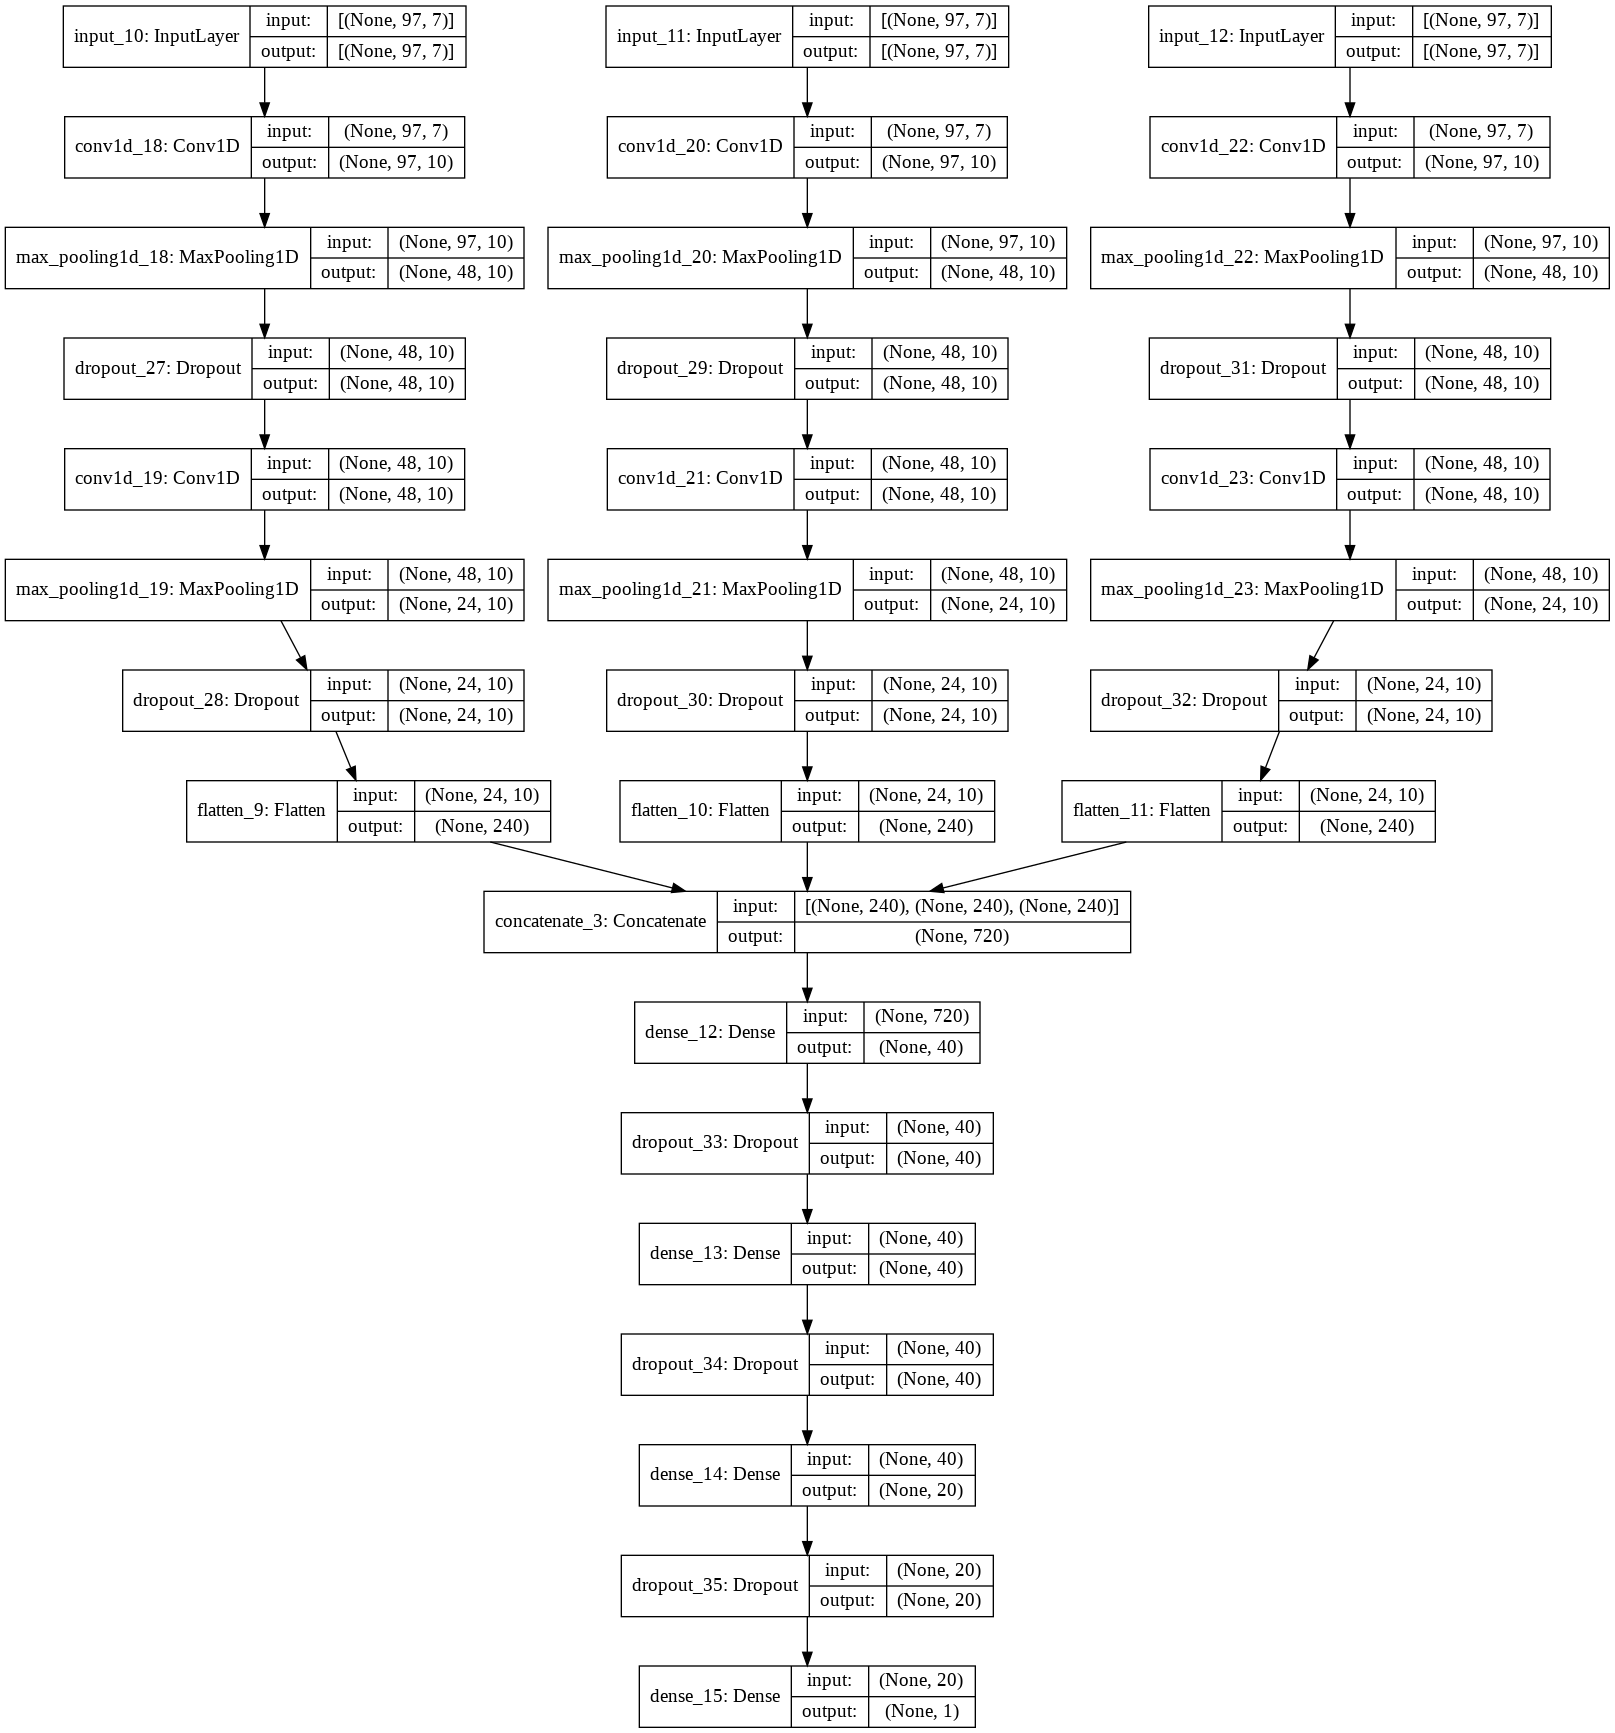

In [23]:
#conv 1 ........................................
#...............................................
visibile_1 = Input(shape=(97,number_of_channels_used))


#conv_1  = MyConvLayer(strides=1, filters=10, starting_length=2,gap=1,ending_length=1,activation = tf.nn.relu)(visibile_1)
conv_1 = Conv1D(filters=10,kernel_size=12,padding='same',data_format='channels_last',activation='relu')(visibile_1)
conv_1 = MaxPool1D(pool_size=2,strides=2,data_format='channels_last')(conv_1)
conv_1 = Dropout(0.25)(conv_1)

conv_1 = Conv1D(filters=10,kernel_size=3,padding='same',data_format='channels_last',activation='relu')(conv_1)
conv_1 = MaxPool1D(pool_size=2,strides=2,data_format='channels_last')(conv_1)
conv_1 = Dropout(0.25)(conv_1)



flat_1 = Flatten()(conv_1)

############################################################################################


#conv 2 ........................................
#...............................................
visibile_2 = Input(shape=(97,number_of_channels_used))


conv_2 = Conv1D(filters=10,kernel_size=12,padding='same',data_format='channels_last',activation='relu')(visibile_2)
conv_2 = MaxPool1D(pool_size=2,strides=2,data_format='channels_last')(conv_2)
conv_2 = Dropout(0.25)(conv_2)


conv_2 = Conv1D(filters=10,kernel_size=3,padding='same',data_format='channels_last',activation='relu')(conv_2)
conv_2 = MaxPool1D(pool_size=2,strides=2,data_format='channels_last')(conv_2)
conv_2 = Dropout(0.25)(conv_2)



flat_2 = Flatten()(conv_2)

############################################################################################

#conv 3 ........................................
#...............................................
visibile_3 = Input(shape=(97,number_of_channels_used))

conv_3 = Conv1D(filters=10,kernel_size=12,padding='same',data_format='channels_last',activation='relu')(visibile_3)
conv_3 = MaxPool1D(pool_size=2,strides=2,data_format='channels_last')(conv_3)
conv_3 = Dropout(0.25)(conv_3)


conv_3 = Conv1D(filters=10,kernel_size=3,padding='same',data_format='channels_last',activation='relu')(conv_3)
conv_3 = MaxPool1D(pool_size=2,strides=2,data_format='channels_last')(conv_3)
conv_3 = Dropout(0.25)(conv_3)



flat_3 = Flatten()(conv_3)

############################################################################################

# merge
merged = concatenate([flat_1, flat_2, flat_3])

dense_1 = Dense(40,activation='relu')(merged)
dropout_1 = Dropout(0.25)(dense_1)

dense_2 = Dense(40,activation='relu')(dropout_1)
dropout_2 = Dropout(0.25)(dense_2)

dense_3 = Dense(20,activation='relu')(dropout_2)
dropout_3 = Dropout(0.25)(dense_3)

output = Dense(1,activation='sigmoid')(dropout_3)

############################################################################################

model = Model(inputs=[visibile_1,visibile_2,visibile_3], outputs=output)

print(model.summary())
#plot_model(model, show_shapes=True, to_file='multiHeadedCNNWithPhysico.png')
plot_model(model, show_shapes=True)


In [0]:
early_stopping_monitor = EarlyStopping(patience=50)


In [21]:
optimizer = Adam(lr=0.00005)
#optimizer = SGD(lr= 0.00001, momentum=0.9)


model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
filepath = "model_22.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=False)
callback_list = [checkpoint]
history = model.fit(x=[X_train,X_train,X_train],y=y_train,validation_data=([X_val,X_val,X_val],y_val), epochs=500, callbacks=callback_list, batch_size=16)


Train on 548 samples, validate on 192 samples
Epoch 1/500
496/548 [==========================>...] - ETA: 0s - loss: 0.8228 - acc: 0.5101
Epoch 00001: val_acc improved from -inf to 0.47396, saving model to model_22.h5
548/548 [==============================] - 2s 3ms/sample - loss: 0.8297 - acc: 0.5073 - val_loss: 0.6938 - val_acc: 0.4740
Epoch 2/500
496/548 [==========================>...] - ETA: 0s - loss: 0.7734 - acc: 0.4899
Epoch 00002: val_acc improved from 0.47396 to 0.50000, saving model to model_22.h5
548/548 [==============================] - 0s 786us/sample - loss: 0.7732 - acc: 0.4836 - val_loss: 0.6904 - val_acc: 0.5000
Epoch 3/500
496/548 [==========================>...] - ETA: 0s - loss: 0.7253 - acc: 0.5444
Epoch 00003: val_acc improved from 0.50000 to 0.55208, saving model to model_22.h5
548/548 [==============================] - 0s 800us/sample - loss: 0.7250 - acc: 0.5456 - val_loss: 0.6874 - val_acc: 0.5521
Epoch 4/500
496/548 [==========================>...] - ETA:

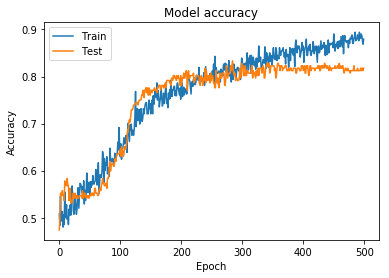

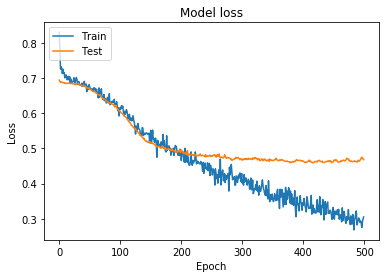

In [22]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()